In [1]:
#Libraries

import pandas as pd
from google.colab import drive
import warnings
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import operator
import string
import nltk
from datetime import datetime
from collections import Counter

#Formatting
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

warnings.filterwarnings("ignore")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.


In [2]:
drive.mount("/google_drive")
WORKSPACE_PATH = "/google_drive/My Drive/MBD Capstone"


xls = pd.ExcelFile(WORKSPACE_PATH+ '/ie_input_data IIII.xlsx')
predictors = pd.read_excel(xls, 'predictors')
labels = pd.read_excel(xls, 'labels')

Drive already mounted at /google_drive; to attempt to forcibly remount, call drive.mount("/google_drive", force_remount=True).


In [3]:
drive.mount("/google_drive")
WORKSPACE_PATH = "/google_drive/My Drive/MBD Capstone"
df_sin_no = pd.read_excel(WORKSPACE_PATH+ '/ie_input_data_no_character_sin_no.xlsx')

Drive already mounted at /google_drive; to attempt to forcibly remount, call drive.mount("/google_drive", force_remount=True).


In [4]:
df_sin_no.head(5)

,Unnamed: 0,unique_id,text,idioma,show_up,text_answers,last_answer,cat_answer
0,0,1824583,"Hola Jorge. Mi nombre es Julia Tiene cita de Ecografia en Hospital INMACULADA Grupo HLA el jueves a las 19:00 horas. ¿Confirma su asistencia? Si , gracias. Hola Espero que esté bien Le recuerdo que tiene una cita con Si no puede asistir, rogamos nos avise para poder asignar la cita a otro paciente.",es,1,"Si , gracias.","Si , gracias.",2
1,1,1828620,"Hola Rosario. Mi nombre es Julia Tiene cita de Ecografia en Centro de Diagnóstico Natalio Rivas el viernes a las 12:40 horas. ¿Confirma su asistencia? Si Hola Espero que esté bien Le recuerdo que tiene una cita con Si no puede asistir, rogamos nos avise para poder asignar la cita a otro paciente.",es,1,Si,Si,1
2,2,1829301,"Hola Ana. Mi nombre es Julia Tiene cita de Ecografia en Hospital INMACULADA Grupo HLA el sábado a las 12:30 horas. ¿Confirma su asistencia? Si allí estaré!!!, Gracias Hola Espero que esté bien Le recuerdo que tiene una cita con Si no puede asistir, rogamos nos avise para poder asignar la cita a otro paciente.",es,0,"Si allí estaré!!!, Gracias","Si allí estaré!!!, Gracias",2
3,3,1831509,"Hola, buenos días Jose, Mi nombre es Julia. Espero que esté bien. Le escribo para confirmar su cita de Ecografia el viernes a las 18:15 horas en Hospital INMACULADA Grupo HLA, ubicado en C/ Alejandro Otero, 8, 18004 Granada. ¿Confirma la cita? Me mantengo a la espera de su respuesta. Saludos, Julia Eniax Atencion al Paciente Buenos días Jose, Le escribo de nuevo para solicitar la confirmación de la cita que tiene usted de Ecografia el viernes a las 18:15 horas en Hospital INMACULADA Grupo HLA, ubicado en C/ Alejandro Otero, 8, 18004 Granada. Esperamos su respuesta para proceder a la confirmación de su cita. ¿Podrá asistir a la cita? Saludos, Julia Eniax Atencion al Paciente Hola Jose. Espero que esté bien Tiene cita de Ecografia en Hospital INMACULADA Grupo HLA mañana a las 18:15 horas. ¿Confirma su asistencia? Si Estimado Jose, Recuerde su cita de Ecografia para hoy a las 18:15 horas en Hospital INMACULADA Grupo HLA, ubicado en C/ Alejandro Otero, 8, 18004 Granada. Le rogamos acuda a su prueba con 10 minutos de antelación para gestionar su admisión. En caso de no poder asistir, por favor, le pedimos informar por este medio. Agradecemos su colaboración debido a la alta demanda de citas. Saludos, Julia Eniax Atencion al Paciente",es,1,Si,Si,1
4,4,1833572,"Hola Gloria. Espero que esté bien Tiene cita de Resonancia Magnética en Centro de Diagnóstico Granada - Clínica CEDISA hoy a las 15:00 horas. ¿Confirma su asistencia? ,si",es,1,",si",",si",1


In [5]:
predictors.head()

,unique_id,channel,subject,text,created,delivered_at,executed_at,read_at,rejected_at,reserved_date,sent_at,updated_at,source,state,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola Laura,\n\nAgendaste un turno para el lunes 18 a las 15:00 hs. con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo).\n\n¿Asistirás?\n\nTu respuesta es muy importante para nosotros.\n\nHasta luego, \nSaludos,\nPia<br/>Asistente de turnos",1.649675e+09,1.649675e+09,1.649675e+09,1.649691e+09,0.0,1.650308e+09,1.649675e+09,1.649675e+09,0.0,read,NaN,NaN,NaT
1,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,1.649691e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.650308e+09,0.000000e+00,1.649691e+09,1.0,created,NaN,NaN,NaT
2,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Laura,\n\nQuedó confirmado el turno para el lunes 18 a las 15:00 horas con Alan Klubok de Dermatología en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nSi, en el futuro, por algún motivo no podés asistir te pedimos que nos avises por esta vía.\n \nTe esperamos!\n\nSaludos cordiales,\nPia<br/>Asistente de turnos",1.649691e+09,1.649691e+09,1.649691e+09,0.000000e+00,0.0,1.650308e+09,1.649691e+09,1.649691e+09,0.0,delivered,NaN,NaN,NaT
3,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola, buenos días Laura,\n\nTe escribo para recordarte que tenés agendado un turno hoy a las 15:00 horas con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nTe recomendamos el día del turno presentarte con 15 minutos de anticipación. Recordá traer tu credencial y DNI.\n\nEn caso de no poder asistir por favor te pedimos informar por este medio, agredecemos tu colaboración dada la alta demanda de turnos.\n\n¿Qué te pareció el servicio de confirmación de turnos? <br />Seleccioná el dedo que vaya más acorde a tu respuesta: \n <a href='https://studies.eniax.cl/simple/swissmedical/1/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👍</a>&nbsp;&nbsp;&nbsp;<a href='https://studies.eniax.cl/simple/swissmedical/0/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👎</a> \n\nSaludos cordiales,\nPia<br/>Asistente de turnos",1.650283e+09,1.650284e+09,1.650284e+09,1.650301e+09,0.0,1.650308e+09,1.650284e+09,1.650283e+09,0.0,read,NaN,NaN,NaT
4,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,1.650301e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.0,1.650308e+09,0.000000e+00,1.650301e+09,1.0,created,NaN,NaN,NaT


In [6]:
predictors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7809 entries, 0 to 7808
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   unique_id      7809 non-null   float64       
 1   channel        7809 non-null   object        
 2   subject        5630 non-null   object        
 3   text           7802 non-null   object        
 4   created        7809 non-null   float64       
 5   delivered_at   7809 non-null   float64       
 6   executed_at    7809 non-null   float64       
 7   read_at        7809 non-null   float64       
 8   rejected_at    7809 non-null   float64       
 9   reserved_date  7809 non-null   float64       
 10  sent_at        7809 non-null   float64       
 11  updated_at     7809 non-null   float64       
 12  source         7809 non-null   float64       
 13  state          7809 non-null   object        
 14  Unnamed: 14    0 non-null      float64       
 15  Unnamed: 15    0 non-

In [7]:
predictors.columns

Index(['unique_id', 'channel', 'subject', 'text', 'created', 'delivered_at',
       'executed_at', 'read_at', 'rejected_at', 'reserved_date', 'sent_at',
       'updated_at', 'source', 'state', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16'],
      dtype='object')

In [8]:
### Counting number of channels of communication

predictors['amount_channels'] = 0
for i in predictors.index:
  predictors['amount_channels'][i] = len(predictors[predictors['unique_id']==predictors['unique_id'][i]]['channel'].unique())

In [9]:
### Replace the 0 with NAN:

time_columns = ['created', 'delivered_at','executed_at', 'read_at', 'rejected_at', 'reserved_date', 'sent_at', 'updated_at']
temp_list = []

for col in time_columns:
  temp_list = []
  
  for date in predictors[col]:
    if date == 0:
      temp_list.append(0)
    else:
      temp_list.append(date)
  
  predictors[col] = temp_list

### Convert to UNIX Timestamp

time_columns = ['created', 'delivered_at','executed_at', 'read_at', 'rejected_at', 'reserved_date', 'sent_at', 'updated_at']

for col in time_columns:
  predictors[col] = pd.to_datetime(predictors[col], unit='s')

In [10]:
### Calculate Total Number of Interactions

predictors['total_num_interactions'] = 0
for i in predictors.index:
  predictors['total_num_interactions'][i] = predictors[predictors['unique_id'] == predictors['unique_id'][i]]['unique_id'].count()

In [11]:
### Calculate Interaction from Patient and Clinic

predictors['user_num_interactions'] = 0
for i in predictors.index:
  predictors['user_num_interactions'][i] = predictors[(predictors['unique_id'] == predictors['unique_id'][i])&(predictors['source']== 1)]['source'].count()

predictors['eniax_num_interactions'] = predictors['total_num_interactions'] - predictors['user_num_interactions']
predictors.drop(index= predictors[(predictors['eniax_num_interactions']==0)].index, axis=0, inplace=False)
predictors['response_rate'] = predictors['user_num_interactions'] / predictors['eniax_num_interactions']

In [12]:
predictors = predictors.drop(196, axis=0)

In [13]:
from datetime import datetime
import datetime

predictors['time_to_read'] = 0
for i in predictors.index:
  if predictors['read_at'][i]==0:
    pass
  elif predictors['read_at'][i] < predictors['delivered_at'][i]:
    pass
  elif predictors['source'][i]==0:
    predictors['time_to_read'][i] = predictors['read_at'][i]-predictors['delivered_at'][i]
  else:
    0

predictors['response_time_delivered'] = 0
for i in predictors.index:
  if i == 0:
    pass
  elif predictors['source'][i]==1:
    predictors['response_time_delivered'][i] = predictors['created'][i]-predictors['delivered_at'][i-1]
  else:
    0
                                        

predictors['response_time_read'] = 0
for i in predictors.index:
  if i == 0:
    pass
  elif predictors['source'][i]==1:
    predictors['response_time_read'][i] = predictors['created'][i]-predictors['read_at'][i-1]
  else:
    0
    
predictors.head(50)


,unique_id,channel,subject,text,created,delivered_at,executed_at,read_at,rejected_at,reserved_date,sent_at,updated_at,source,state,Unnamed: 14,Unnamed: 15,Unnamed: 16,amount_channels,total_num_interactions,user_num_interactions,eniax_num_interactions,response_rate,time_to_read,response_time_delivered,response_time_read
0,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola Laura,\n\nAgendaste un turno para el lunes 18 a las 15:00 hs. con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo).\n\n¿Asistirás?\n\nTu respuesta es muy importante para nosotros.\n\nHasta luego, \nSaludos,\nPia<br/>Asistente de turnos",2022-04-11 10:56:09.275939840,2022-04-11 11:02:31.243779840,2022-04-11 11:02:23.968290048,2022-04-11 15:26:40.210160128,1970-01-01,2022-04-18 19:00:00,2022-04-11 11:02:31.165129984,2022-04-11 10:56:09.275859968,0.0,read,NaN,NaN,NaT,1,8,3,5,0.600000,0 days 04:24:08.966380288,0,0
1,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,2022-04-11 15:34:52.250629888,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,1970-01-01 00:00:00.000000000,2022-04-11 15:34:52.250560000,1.0,created,NaN,NaN,NaT,1,8,3,5,0.600000,0,0 days 04:32:21.006850048,0 days 00:08:12.040469760
2,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Laura,\n\nQuedó confirmado el turno para el lunes 18 a las 15:00 horas con Alan Klubok de Dermatología en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nSi, en el futuro, por algún motivo no podés asistir te pedimos que nos avises por esta vía.\n \nTe esperamos!\n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-11 15:35:11.555219968,2022-04-11 15:35:56.987020032,2022-04-11 15:35:12.467139840,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,2022-04-11 15:35:56.827840000,2022-04-11 15:35:11.555119872,0.0,delivered,NaN,NaN,NaT,1,8,3,5,0.600000,0,0,0
3,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola, buenos días Laura,\n\nTe escribo para recordarte que tenés agendado un turno hoy a las 15:00 horas con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nTe recomendamos el día del turno presentarte con 15 minutos de anticipación. Recordá traer tu credencial y DNI.\n\nEn caso de no poder asistir por favor te pedimos informar por este medio, agredecemos tu colaboración dada la alta demanda de turnos.\n\n¿Qué te pareció el servicio de confirmación de turnos? <br />Seleccioná el dedo que vaya más acorde a tu respuesta: \n <a href='https://studies.eniax.cl/simple/swissmedical/1/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👍</a>&nbsp;&nbsp;&nbsp;<a href='https://studies.eniax.cl/simple/swissmedical/0/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👎</a> \n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-18 12:04:52.870460160,2022-04-18 12:07:30.250690048,2022-04-18 12:07:18.561850112,2022-04-18 16:48:32.993220096,1970-01-01,2022-04-18 19:00:00,2022-04-18 12:07:22.147089920,2022-04-18 12:04:52.870369792,0.0,read,NaN,NaN,NaT,1,8,3,5,0.600000,0 days 04:41:02.742530048,0,0
4,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,2022-04-18 16:52:41.279810048,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,1970-01-01 00:00:00.000000000,2022-04-18 16:52:41.279730176,1.0,created,NaN,NaN,NaT,1,8,3,5,0.600000,0,0 days 04:45:11.029120,0 days 00:04:08.286589952
5,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Muchas gracias por elegir Swiss Medical Center, Laura. \n\nSaludos,\nPia<br/>Asistente de turnos",2022-04-18 16:52:47.679089920,2022-04-18 16:52:59.437629952,2022-04-18 16:52:48

In [14]:
predictors = pd.get_dummies(predictors, columns=['state'])
predictors['num_unread'] = 0
predictors['num_rejected'] = 0
predictors['num_sent'] = 0
for i in predictors.index:
  predictors['num_unread'][i] = predictors[(predictors['unique_id'] == predictors['unique_id'][i])&(predictors['state_delivered']== 1)]['state_delivered'].count()
  predictors['num_rejected'][i] = predictors[(predictors['unique_id'] == predictors['unique_id'][i])&(predictors['state_rejected']== 1)]['state_rejected'].count()
  predictors['num_sent'][i] = predictors[(predictors['unique_id'] == predictors['unique_id'][i])&(predictors['state_sent']== 1)]['state_sent'].count()
predictors.head(50)

,unique_id,channel,subject,text,created,delivered_at,executed_at,read_at,rejected_at,reserved_date,sent_at,updated_at,source,Unnamed: 14,Unnamed: 15,Unnamed: 16,amount_channels,total_num_interactions,user_num_interactions,eniax_num_interactions,response_rate,time_to_read,response_time_delivered,response_time_read,state_created,state_delivered,state_read,state_rejected,state_sent,num_unread,num_rejected,num_sent
0,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola Laura,\n\nAgendaste un turno para el lunes 18 a las 15:00 hs. con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo).\n\n¿Asistirás?\n\nTu respuesta es muy importante para nosotros.\n\nHasta luego, \nSaludos,\nPia<br/>Asistente de turnos",2022-04-11 10:56:09.275939840,2022-04-11 11:02:31.243779840,2022-04-11 11:02:23.968290048,2022-04-11 15:26:40.210160128,1970-01-01,2022-04-18 19:00:00,2022-04-11 11:02:31.165129984,2022-04-11 10:56:09.275859968,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,0 days 04:24:08.966380288,0,0,0,0,1,0,0,1,0,0
1,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,2022-04-11 15:34:52.250629888,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,1970-01-01 00:00:00.000000000,2022-04-11 15:34:52.250560000,1.0,NaN,NaN,NaT,1,8,3,5,0.600000,0,0 days 04:32:21.006850048,0 days 00:08:12.040469760,1,0,0,0,0,1,0,0
2,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Laura,\n\nQuedó confirmado el turno para el lunes 18 a las 15:00 horas con Alan Klubok de Dermatología en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nSi, en el futuro, por algún motivo no podés asistir te pedimos que nos avises por esta vía.\n \nTe esperamos!\n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-11 15:35:11.555219968,2022-04-11 15:35:56.987020032,2022-04-11 15:35:12.467139840,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,2022-04-11 15:35:56.827840000,2022-04-11 15:35:11.555119872,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,0,0,0,0,1,0,0,0,1,0,0
3,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola, buenos días Laura,\n\nTe escribo para recordarte que tenés agendado un turno hoy a las 15:00 horas con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nTe recomendamos el día del turno presentarte con 15 minutos de anticipación. Recordá traer tu credencial y DNI.\n\nEn caso de no poder asistir por favor te pedimos informar por este medio, agredecemos tu colaboración dada la alta demanda de turnos.\n\n¿Qué te pareció el servicio de confirmación de turnos? <br />Seleccioná el dedo que vaya más acorde a tu respuesta: \n <a href='https://studies.eniax.cl/simple/swissmedical/1/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👍</a>&nbsp;&nbsp;&nbsp;<a href='https://studies.eniax.cl/simple/swissmedical/0/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👎</a> \n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-18 12:04:52.870460160,2022-04-18 12:07:30.250690048,2022-04-18 12:07:18.561850112,2022-04-18 16:48:32.993220096,1970-01-01,2022-04-18 19:00:00,2022-04-18 12:07:22.147089920,2022-04-18 12:04:52.870369792,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,0 days 04:41:02.742530048,0,0,0,0,1,0,0,1,0,0
4,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,2022-04-18 16:52:41.279810048,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,1970-01-01 00:00:00.000000000,2022-04-18 16:52:41.279730176,1.0,NaN,NaN,NaT,1,8,3,5,0.600000,0,0 days 04:45:11.029120,0 days 00:04:08.286589952,1,0,0,0,0,1,0,0
5,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Muchas gracias por elegir Swiss Medical

In [15]:
predictors['user_dummy'] = np.where(predictors['source']==1,1,0)
predictors['eniax_dummy'] = np.where(predictors['user_dummy']==1,0,1)
predictors.head(20)

,unique_id,channel,subject,text,created,delivered_at,executed_at,read_at,rejected_at,reserved_date,sent_at,updated_at,source,Unnamed: 14,Unnamed: 15,Unnamed: 16,amount_channels,total_num_interactions,user_num_interactions,eniax_num_interactions,response_rate,time_to_read,response_time_delivered,response_time_read,state_created,state_delivered,state_read,state_rejected,state_sent,num_unread,num_rejected,num_sent,user_dummy,eniax_dummy
0,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola Laura,\n\nAgendaste un turno para el lunes 18 a las 15:00 hs. con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo).\n\n¿Asistirás?\n\nTu respuesta es muy importante para nosotros.\n\nHasta luego, \nSaludos,\nPia<br/>Asistente de turnos",2022-04-11 10:56:09.275939840,2022-04-11 11:02:31.243779840,2022-04-11 11:02:23.968290048,2022-04-11 15:26:40.210160128,1970-01-01,2022-04-18 19:00:00,2022-04-11 11:02:31.165129984,2022-04-11 10:56:09.275859968,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,0 days 04:24:08.966380288,0,0,0,0,1,0,0,1,0,0,0,1
1,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,2022-04-11 15:34:52.250629888,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,1970-01-01 00:00:00.000000000,2022-04-11 15:34:52.250560000,1.0,NaN,NaN,NaT,1,8,3,5,0.600000,0,0 days 04:32:21.006850048,0 days 00:08:12.040469760,1,0,0,0,0,1,0,0,1,0
2,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Laura,\n\nQuedó confirmado el turno para el lunes 18 a las 15:00 horas con Alan Klubok de Dermatología en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nSi, en el futuro, por algún motivo no podés asistir te pedimos que nos avises por esta vía.\n \nTe esperamos!\n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-11 15:35:11.555219968,2022-04-11 15:35:56.987020032,2022-04-11 15:35:12.467139840,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,2022-04-11 15:35:56.827840000,2022-04-11 15:35:11.555119872,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,0,0,0,0,1,0,0,0,1,0,0,0,1
3,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola, buenos días Laura,\n\nTe escribo para recordarte que tenés agendado un turno hoy a las 15:00 horas con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nTe recomendamos el día del turno presentarte con 15 minutos de anticipación. Recordá traer tu credencial y DNI.\n\nEn caso de no poder asistir por favor te pedimos informar por este medio, agredecemos tu colaboración dada la alta demanda de turnos.\n\n¿Qué te pareció el servicio de confirmación de turnos? <br />Seleccioná el dedo que vaya más acorde a tu respuesta: \n <a href='https://studies.eniax.cl/simple/swissmedical/1/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👍</a>&nbsp;&nbsp;&nbsp;<a href='https://studies.eniax.cl/simple/swissmedical/0/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👎</a> \n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-18 12:04:52.870460160,2022-04-18 12:07:30.250690048,2022-04-18 12:07:18.561850112,2022-04-18 16:48:32.993220096,1970-01-01,2022-04-18 19:00:00,2022-04-18 12:07:22.147089920,2022-04-18 12:04:52.870369792,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,0 days 04:41:02.742530048,0,0,0,0,1,0,0,1,0,0,0,1
4,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,2022-04-18 16:52:41.279810048,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,1970-01-01 00:00:00.000000000,2022-04-18 16:52:41.279730176,1.0,NaN,NaN,NaT,1,8,3,5,0.600000,0,0 days 04:45:11.029120,0 days 00:04:08.286589952,1,0,0,0,0,1,0,0,1,0
5,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Cente

In [16]:
## Creating variable with number of interactions

# Creating teh list with the number of interactions
interactions_no = []
counter = 1
last_id = 0

for id in predictors["unique_id"]:
  if  id == last_id:
    counter = counter+1
    interactions_no.append(counter)
  else:
    counter = 1
    interactions_no.append(counter)
  
  last_id = id

# Adding the list to the dataframe
predictors["interaction_no"] = interactions_no
predictors.head(5)

,unique_id,channel,subject,text,created,delivered_at,executed_at,read_at,rejected_at,reserved_date,sent_at,updated_at,source,Unnamed: 14,Unnamed: 15,Unnamed: 16,amount_channels,total_num_interactions,user_num_interactions,eniax_num_interactions,response_rate,time_to_read,response_time_delivered,response_time_read,state_created,state_delivered,state_read,state_rejected,state_sent,num_unread,num_rejected,num_sent,user_dummy,eniax_dummy,interaction_no
0,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola Laura,\n\nAgendaste un turno para el lunes 18 a las 15:00 hs. con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo).\n\n¿Asistirás?\n\nTu respuesta es muy importante para nosotros.\n\nHasta luego, \nSaludos,\nPia<br/>Asistente de turnos",2022-04-11 10:56:09.275939840,2022-04-11 11:02:31.243779840,2022-04-11 11:02:23.968290048,2022-04-11 15:26:40.210160128,1970-01-01,2022-04-18 19:00:00,2022-04-11 11:02:31.165129984,2022-04-11 10:56:09.275859968,0.0,NaN,NaN,NaT,1,8,3,5,0.6,0 days 04:24:08.966380288,0,0,0,0,1,0,0,1,0,0,0,1,1
1,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,2022-04-11 15:34:52.250629888,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,1970-01-01 00:00:00.000000000,2022-04-11 15:34:52.250560000,1.0,NaN,NaN,NaT,1,8,3,5,0.6,0,0 days 04:32:21.006850048,0 days 00:08:12.040469760,1,0,0,0,0,1,0,0,1,0,2
2,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Laura,\n\nQuedó confirmado el turno para el lunes 18 a las 15:00 horas con Alan Klubok de Dermatología en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nSi, en el futuro, por algún motivo no podés asistir te pedimos que nos avises por esta vía.\n \nTe esperamos!\n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-11 15:35:11.555219968,2022-04-11 15:35:56.987020032,2022-04-11 15:35:12.467139840,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,2022-04-11 15:35:56.827840000,2022-04-11 15:35:11.555119872,0.0,NaN,NaN,NaT,1,8,3,5,0.6,0,0,0,0,1,0,0,0,1,0,0,0,1,3
3,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola, buenos días Laura,\n\nTe escribo para recordarte que tenés agendado un turno hoy a las 15:00 horas con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nTe recomendamos el día del turno presentarte con 15 minutos de anticipación. Recordá traer tu credencial y DNI.\n\nEn caso de no poder asistir por favor te pedimos informar por este medio, agredecemos tu colaboración dada la alta demanda de turnos.\n\n¿Qué te pareció el servicio de confirmación de turnos? <br />Seleccioná el dedo que vaya más acorde a tu respuesta: \n <a href='https://studies.eniax.cl/simple/swissmedical/1/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👍</a>&nbsp;&nbsp;&nbsp;<a href='https://studies.eniax.cl/simple/swissmedical/0/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👎</a> \n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-18 12:04:52.870460160,2022-04-18 12:07:30.250690048,2022-04-18 12:07:18.561850112,2022-04-18 16:48:32.993220096,1970-01-01,2022-04-18 19:00:00,2022-04-18 12:07:22.147089920,2022-04-18 12:04:52.870369792,0.0,NaN,NaN,NaT,1,8,3,5,0.6,0 days 04:41:02.742530048,0,0,0,0,1,0,0,1,0,0,0,1,4
4,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,2022-04-18 16:52:41.279810048,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,1970-01-01 00:00:00.000000000,2022-04-18 16:52:41.279730176,1.0,NaN,NaN,NaT,1,8,3,5,0.6,0,0 days 04:45:11.029120,0 days 00:04:08.286589952,1,0,0,0,0,1,0,0,1,0,5


In [17]:
from datetime import datetime
import datetime
predictors['reserved_date'] = pd.to_datetime(predictors['reserved_date'], format = '%d/%m/%Y %H:%M:%S')
for i in predictors.index:
  predictors['appointment_hr'] = predictors['reserved_date'].dt.hour
  predictors['appointment_day'] = predictors['reserved_date'].dt.day
  predictors['appointment_month'] = predictors['reserved_date'].dt.month
  predictors['appointment_weekday'] = predictors['reserved_date'].dt.weekday

In [18]:
predictors['comm_channel'] = np.where(predictors['amount_channels']==2,
                                      '3',
                                      np.where(predictors['channel']=='email',
                                               '1',
                                               '2'))

In [19]:
predictors.head(50)

,unique_id,channel,subject,text,created,delivered_at,executed_at,read_at,rejected_at,reserved_date,sent_at,updated_at,source,Unnamed: 14,Unnamed: 15,Unnamed: 16,amount_channels,total_num_interactions,user_num_interactions,eniax_num_interactions,response_rate,time_to_read,response_time_delivered,response_time_read,state_created,state_delivered,state_read,state_rejected,state_sent,num_unread,num_rejected,num_sent,user_dummy,eniax_dummy,interaction_no,appointment_hr,appointment_day,appointment_month,appointment_weekday,comm_channel
0,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola Laura,\n\nAgendaste un turno para el lunes 18 a las 15:00 hs. con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo).\n\n¿Asistirás?\n\nTu respuesta es muy importante para nosotros.\n\nHasta luego, \nSaludos,\nPia<br/>Asistente de turnos",2022-04-11 10:56:09.275939840,2022-04-11 11:02:31.243779840,2022-04-11 11:02:23.968290048,2022-04-11 15:26:40.210160128,1970-01-01,2022-04-18 19:00:00,2022-04-11 11:02:31.165129984,2022-04-11 10:56:09.275859968,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,0 days 04:24:08.966380288,0,0,0,0,1,0,0,1,0,0,0,1,1,19,18,4,0,1
1,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,2022-04-11 15:34:52.250629888,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,1970-01-01 00:00:00.000000000,2022-04-11 15:34:52.250560000,1.0,NaN,NaN,NaT,1,8,3,5,0.600000,0,0 days 04:32:21.006850048,0 days 00:08:12.040469760,1,0,0,0,0,1,0,0,1,0,2,19,18,4,0,1
2,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Laura,\n\nQuedó confirmado el turno para el lunes 18 a las 15:00 horas con Alan Klubok de Dermatología en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nSi, en el futuro, por algún motivo no podés asistir te pedimos que nos avises por esta vía.\n \nTe esperamos!\n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-11 15:35:11.555219968,2022-04-11 15:35:56.987020032,2022-04-11 15:35:12.467139840,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,2022-04-11 15:35:56.827840000,2022-04-11 15:35:11.555119872,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,0,0,0,0,1,0,0,0,1,0,0,0,1,3,19,18,4,0,1
3,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola, buenos días Laura,\n\nTe escribo para recordarte que tenés agendado un turno hoy a las 15:00 horas con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nTe recomendamos el día del turno presentarte con 15 minutos de anticipación. Recordá traer tu credencial y DNI.\n\nEn caso de no poder asistir por favor te pedimos informar por este medio, agredecemos tu colaboración dada la alta demanda de turnos.\n\n¿Qué te pareció el servicio de confirmación de turnos? <br />Seleccioná el dedo que vaya más acorde a tu respuesta: \n <a href='https://studies.eniax.cl/simple/swissmedical/1/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👍</a>&nbsp;&nbsp;&nbsp;<a href='https://studies.eniax.cl/simple/swissmedical/0/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👎</a> \n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-18 12:04:52.870460160,2022-04-18 12:07:30.250690048,2022-04-18 12:07:18.561850112,2022-04-18 16:48:32.993220096,1970-01-01,2022-04-18 19:00:00,2022-04-18 12:07:22.147089920,2022-04-18 12:04:52.870369792,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,0 days 04:41:02.742530048,0,0,0,0,1,0,0,1,0,0,0,1,4,19,18,4,0,1
4,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,2022-04-18 16:52:41.279810048,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,1970-01-01 00:00:00.000000000,2022-04-18 16:52:41.279730176,1.0,NaN,NaN,NaT,1,8,3,5,0.600000,

In [20]:
# predictors['response_time_delivered'] = pd.to_timedelta(predictors['response_time_delivered'], errors='coerce')
# predictors['response_time_read'] = pd.to_timedelta(predictors['response_time_read'], errors='coerce')

for i in predictors.index:
  if type(predictors['time_to_read'][i])==int:
    pass
  else:
    predictors['time_to_read'][i] = predictors['time_to_read'][i].total_seconds()
  
for i in predictors.index:
  if type(predictors['response_time_delivered'][i])==int:
    pass
  else:
    predictors['response_time_delivered'][i] = predictors['response_time_delivered'][i].total_seconds()

for i in predictors.index:
  if type(predictors['response_time_read'][i])==int:
    pass
  else:
    predictors['response_time_read'][i] = predictors['response_time_read'][i].total_seconds()

# for i in predictors.index:
#   predictors['response_time_delivered'][i] = predictors['response_time_delivered'][i].total_seconds()

# for i in predictors.index:
#   predictors['response_time_read'][i] = predictors['response_time_read'][i].total_seconds()

In [21]:
predictors.head()

,unique_id,channel,subject,text,created,delivered_at,executed_at,read_at,rejected_at,reserved_date,sent_at,updated_at,source,Unnamed: 14,Unnamed: 15,Unnamed: 16,amount_channels,total_num_interactions,user_num_interactions,eniax_num_interactions,response_rate,time_to_read,response_time_delivered,response_time_read,state_created,state_delivered,state_read,state_rejected,state_sent,num_unread,num_rejected,num_sent,user_dummy,eniax_dummy,interaction_no,appointment_hr,appointment_day,appointment_month,appointment_weekday,comm_channel
0,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola Laura,\n\nAgendaste un turno para el lunes 18 a las 15:00 hs. con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo).\n\n¿Asistirás?\n\nTu respuesta es muy importante para nosotros.\n\nHasta luego, \nSaludos,\nPia<br/>Asistente de turnos",2022-04-11 10:56:09.275939840,2022-04-11 11:02:31.243779840,2022-04-11 11:02:23.968290048,2022-04-11 15:26:40.210160128,1970-01-01,2022-04-18 19:00:00,2022-04-11 11:02:31.165129984,2022-04-11 10:56:09.275859968,0.0,NaN,NaN,NaT,1,8,3,5,0.6,15848.96638,0,0,0,0,1,0,0,1,0,0,0,1,1,19,18,4,0,1
1,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,2022-04-11 15:34:52.250629888,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,1970-01-01 00:00:00.000000000,2022-04-11 15:34:52.250560000,1.0,NaN,NaN,NaT,1,8,3,5,0.6,0,16341.00685,492.040469,1,0,0,0,0,1,0,0,1,0,2,19,18,4,0,1
2,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Laura,\n\nQuedó confirmado el turno para el lunes 18 a las 15:00 horas con Alan Klubok de Dermatología en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nSi, en el futuro, por algún motivo no podés asistir te pedimos que nos avises por esta vía.\n \nTe esperamos!\n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-11 15:35:11.555219968,2022-04-11 15:35:56.987020032,2022-04-11 15:35:12.467139840,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,2022-04-11 15:35:56.827840000,2022-04-11 15:35:11.555119872,0.0,NaN,NaN,NaT,1,8,3,5,0.6,0,0,0,0,1,0,0,0,1,0,0,0,1,3,19,18,4,0,1
3,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola, buenos días Laura,\n\nTe escribo para recordarte que tenés agendado un turno hoy a las 15:00 horas con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nTe recomendamos el día del turno presentarte con 15 minutos de anticipación. Recordá traer tu credencial y DNI.\n\nEn caso de no poder asistir por favor te pedimos informar por este medio, agredecemos tu colaboración dada la alta demanda de turnos.\n\n¿Qué te pareció el servicio de confirmación de turnos? <br />Seleccioná el dedo que vaya más acorde a tu respuesta: \n <a href='https://studies.eniax.cl/simple/swissmedical/1/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👍</a>&nbsp;&nbsp;&nbsp;<a href='https://studies.eniax.cl/simple/swissmedical/0/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👎</a> \n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-18 12:04:52.870460160,2022-04-18 12:07:30.250690048,2022-04-18 12:07:18.561850112,2022-04-18 16:48:32.993220096,1970-01-01,2022-04-18 19:00:00,2022-04-18 12:07:22.147089920,2022-04-18 12:04:52.870369792,0.0,NaN,NaN,NaT,1,8,3,5,0.6,16862.74253,0,0,0,0,1,0,0,1,0,0,0,1,4,19,18,4,0,1
4,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,2022-04-18 16:52:41.279810048,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,1970-01-01 00:00:00.000000000,2022-04-18 16:52:41.279730176,1.0,NaN,NaN,NaT,1,8,3,5,0.6,0,17111.02912,248.286589,1,0,0,0,0,1,0,0,1,0,5,19,18,4,0,1


In [22]:
# max min cols
predictors['time_to_read_max'] = 0
for i in predictors.index:
  predictors['time_to_read_max'][i] = predictors[(predictors['unique_id'] == predictors['unique_id'][i])]['time_to_read'].max()

predictors['time_to_read_min'] = 0
for i in predictors.index:
  predictors['time_to_read_max'][i] = predictors[(predictors['unique_id'] == predictors['unique_id'][i])]['time_to_read'].min()

predictors['time_to_read_mean'] = 0
for i in predictors.index:
  predictors['time_to_read_max'][i] = predictors[(predictors['unique_id'] == predictors['unique_id'][i])]['time_to_read'].mean()

###############################################################

predictors['response_time_delivered_max'] = 0
for i in predictors.index:
  predictors['response_time_delivered_max'][i] = predictors[(predictors['unique_id'] == predictors['unique_id'][i])]['response_time_delivered'].max()

predictors['response_time_delivered_min'] = 0
for i in predictors.index:
  predictors['response_time_delivered_min'][i] = predictors[(predictors['unique_id'] == predictors['unique_id'][i])]['response_time_delivered'].min()

predictors['response_time_delivered_mean'] = 0
for i in predictors.index:
  predictors['response_time_delivered_mean'][i] = predictors[(predictors['unique_id'] == predictors['unique_id'][i])]['response_time_delivered'].mean()

###############################################################

predictors['response_time_read_max'] = 0
for i in predictors.index:
  predictors['response_time_read_max'][i] = predictors[(predictors['unique_id'] == predictors['unique_id'][i])]['response_time_read'].max()

predictors['response_time_read_min'] = 0
for i in predictors.index:
  predictors['response_time_read_min'][i] = predictors[(predictors['unique_id'] == predictors['unique_id'][i])]['response_time_read'].min()

predictors['response_time_read_mean'] = 0
for i in predictors.index:
  predictors['response_time_read_mean'][i] = predictors[(predictors['unique_id'] == predictors['unique_id'][i])]['response_time_read'].mean()

In [23]:
predictors['response_time_delivered'][10]

0

In [24]:
print(type(predictors['time_to_read']))
print(type(predictors['response_time_delivered']))
print(type(predictors['response_time_read']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [25]:
predictors['time_to_read'].max()

1856413.52053

In [26]:
predictors.head(50)

,unique_id,channel,subject,text,created,delivered_at,executed_at,read_at,rejected_at,reserved_date,sent_at,updated_at,source,Unnamed: 14,Unnamed: 15,Unnamed: 16,amount_channels,total_num_interactions,user_num_interactions,eniax_num_interactions,response_rate,time_to_read,response_time_delivered,response_time_read,state_created,state_delivered,state_read,state_rejected,state_sent,num_unread,num_rejected,num_sent,user_dummy,eniax_dummy,interaction_no,appointment_hr,appointment_day,appointment_month,appointment_weekday,comm_channel,time_to_read_max,time_to_read_min,time_to_read_mean,response_time_delivered_max,response_time_delivered_min,response_time_delivered_mean,response_time_read_max,response_time_read_min,response_time_read_mean
0,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola Laura,\n\nAgendaste un turno para el lunes 18 a las 15:00 hs. con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo).\n\n¿Asistirás?\n\nTu respuesta es muy importante para nosotros.\n\nHasta luego, \nSaludos,\nPia<br/>Asistente de turnos",2022-04-11 10:56:09.275939840,2022-04-11 11:02:31.243779840,2022-04-11 11:02:23.968290048,2022-04-11 15:26:40.210160128,1970-01-01,2022-04-18 19:00:00,2022-04-11 11:02:31.165129984,2022-04-11 10:56:09.275859968,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,15848.96638,0,0,0,0,1,0,0,1,0,0,0,1,1,19,18,4,0,1,4555,0,0,17111,0,4674,492,0,125
1,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,2022-04-11 15:34:52.250629888,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,1970-01-01 00:00:00.000000000,2022-04-11 15:34:52.250560000,1.0,NaN,NaN,NaT,1,8,3,5,0.600000,0,16341.00685,492.040469,1,0,0,0,0,1,0,0,1,0,2,19,18,4,0,1,4555,0,0,17111,0,4674,492,0,125
2,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Laura,\n\nQuedó confirmado el turno para el lunes 18 a las 15:00 horas con Alan Klubok de Dermatología en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nSi, en el futuro, por algún motivo no podés asistir te pedimos que nos avises por esta vía.\n \nTe esperamos!\n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-11 15:35:11.555219968,2022-04-11 15:35:56.987020032,2022-04-11 15:35:12.467139840,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,2022-04-11 15:35:56.827840000,2022-04-11 15:35:11.555119872,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,0,0,0,0,1,0,0,0,1,0,0,0,1,3,19,18,4,0,1,4555,0,0,17111,0,4674,492,0,125
3,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola, buenos días Laura,\n\nTe escribo para recordarte que tenés agendado un turno hoy a las 15:00 horas con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nTe recomendamos el día del turno presentarte con 15 minutos de anticipación. Recordá traer tu credencial y DNI.\n\nEn caso de no poder asistir por favor te pedimos informar por este medio, agredecemos tu colaboración dada la alta demanda de turnos.\n\n¿Qué te pareció el servicio de confirmación de turnos? <br />Seleccioná el dedo que vaya más acorde a tu respuesta: \n <a href='https://studies.eniax.cl/simple/swissmedical/1/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👍</a>&nbsp;&nbsp;&nbsp;<a href='https://studies.eniax.cl/simple/swissmedical/0/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👎</a> \n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-18 12:04:52.870460160,2022-04-18 12:07:30.250690048,2022-04-18 12:07:18.561850112,2022-04-18 16:48:32.993220096,1970-01-01,2022-04-18 19:00:00,2022-04-18 12:07:22.147089920,2022-04-18 12:04:52.870369792,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,16862.74253,0,0,0,0,1,0,0,1,0,0,0,1,4,19,18,4,0,1,4555,0,0,17111,0,4674,492,0,125
4,16072332.0,email,"Re: Recordatorio turno, lunes 18 d

In [27]:
# General word_count column
predictors['word_count'] = predictors['text'].apply(lambda x: len(str(x).split()))

# Just patient word_count
predictors['patient_word_count'] = np.where(predictors['source'] == 1, predictors['text'].apply(lambda x: len(str(x).split())), 0)

# Just 'assistant' word_count
predictors['assistant_word_count'] = np.where(predictors['source'] != 1, predictors['text'].apply(lambda x: len(str(x).split())), 0)

predictors.head(50)

,unique_id,channel,subject,text,created,delivered_at,executed_at,read_at,rejected_at,reserved_date,sent_at,updated_at,source,Unnamed: 14,Unnamed: 15,Unnamed: 16,amount_channels,total_num_interactions,user_num_interactions,eniax_num_interactions,response_rate,time_to_read,response_time_delivered,response_time_read,state_created,state_delivered,state_read,state_rejected,state_sent,num_unread,num_rejected,num_sent,user_dummy,eniax_dummy,interaction_no,appointment_hr,appointment_day,appointment_month,appointment_weekday,comm_channel,time_to_read_max,time_to_read_min,time_to_read_mean,response_time_delivered_max,response_time_delivered_min,response_time_delivered_mean,response_time_read_max,response_time_read_min,response_time_read_mean,word_count,patient_word_count,assistant_word_count
0,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola Laura,\n\nAgendaste un turno para el lunes 18 a las 15:00 hs. con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo).\n\n¿Asistirás?\n\nTu respuesta es muy importante para nosotros.\n\nHasta luego, \nSaludos,\nPia<br/>Asistente de turnos",2022-04-11 10:56:09.275939840,2022-04-11 11:02:31.243779840,2022-04-11 11:02:23.968290048,2022-04-11 15:26:40.210160128,1970-01-01,2022-04-18 19:00:00,2022-04-11 11:02:31.165129984,2022-04-11 10:56:09.275859968,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,15848.96638,0,0,0,0,1,0,0,1,0,0,0,1,1,19,18,4,0,1,4555,0,0,17111,0,4674,492,0,125,38,0,38
1,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center",Si,2022-04-11 15:34:52.250629888,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,1970-01-01 00:00:00.000000000,2022-04-11 15:34:52.250560000,1.0,NaN,NaN,NaT,1,8,3,5,0.600000,0,16341.00685,492.040469,1,0,0,0,0,1,0,0,1,0,2,19,18,4,0,1,4555,0,0,17111,0,4674,492,0,125,1,1,0
2,16072332.0,email,"Re: Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Laura,\n\nQuedó confirmado el turno para el lunes 18 a las 15:00 horas con Alan Klubok de Dermatología en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nSi, en el futuro, por algún motivo no podés asistir te pedimos que nos avises por esta vía.\n \nTe esperamos!\n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-11 15:35:11.555219968,2022-04-11 15:35:56.987020032,2022-04-11 15:35:12.467139840,1970-01-01 00:00:00.000000000,1970-01-01,2022-04-18 19:00:00,2022-04-11 15:35:56.827840000,2022-04-11 15:35:11.555119872,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,0,0,0,0,1,0,0,0,1,0,0,0,1,3,19,18,4,0,1,4555,0,0,17111,0,4674,492,0,125,58,0,58
3,16072332.0,email,"Recordatorio turno, lunes 18 de abril, Swiss Medical Center","Hola, buenos días Laura,\n\nTe escribo para recordarte que tenés agendado un turno hoy a las 15:00 horas con Alan Klubok en Swiss Medical Center Microcentro (25 de Mayo), 25 de Mayo 264, Capital Federal, Argentina.\n\nTe recomendamos el día del turno presentarte con 15 minutos de anticipación. Recordá traer tu credencial y DNI.\n\nEn caso de no poder asistir por favor te pedimos informar por este medio, agredecemos tu colaboración dada la alta demanda de turnos.\n\n¿Qué te pareció el servicio de confirmación de turnos? <br />Seleccioná el dedo que vaya más acorde a tu respuesta: \n <a href='https://studies.eniax.cl/simple/swissmedical/1/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👍</a>&nbsp;&nbsp;&nbsp;<a href='https://studies.eniax.cl/simple/swissmedical/0/?job_id=62525a604f29b7a467c05713' style='font-size: 32px; text-decoration: none;'>👎</a> \n\nSaludos cordiales,\nPia<br/>Asistente de turnos",2022-04-18 12:04:52.870460160,2022-04-18 12:07:30.250690048,2022-04-18 12:07:18.561850112,2022-04-18 16:48:32.993220096,1970-01-01,2022-04-18 19:00:00,2022-04-18 12:07:22.147089920,2022-04-18 12:04:52.870369792,0.0,NaN,NaN,NaT,1,8,3,5,0.600000,16862.74253,0,0,0,0,1,0,0,1,0,0,0,1,4,19,18,4,0,1,4555,0,0,1711

In [28]:
to_drop = ['channel', 'subject', 'text', 'created',	'delivered_at',	'executed_at',	'read_at',	'rejected_at',	'reserved_date',	'sent_at',	'updated_at',	'source',	'Unnamed: 14',	'Unnamed: 15',	'Unnamed: 16', 'state_created',	'state_delivered',	'state_read',	'state_rejected',	'state_sent', 'user_dummy',	'eniax_dummy',	'interaction_no']
calc_mean = ['amount_channels', 'total_num_interactions',	'user_num_interactions',	'eniax_num_interactions', 'time_to_read',	'response_time_delivered',	'response_time_read', 'num_unread',	'num_rejected',	'num_sent', 'appointment_hr',	'appointment_day',	'appointment_month',	'appointment_weekday',	'comm_channel', 'response_rate', 'word_count',	'patient_word_count',	'assistant_word_count']
calc_max = ['time_to_read',	'response_time_delivered',	'response_time_read']
calc_min = ['time_to_read',	'response_time_delivered',	'response_time_read']

In [29]:
import pandas as pd

pivot_mean = pd.pivot_table(
    data=predictors, 
    values=calc_mean,
    index=["unique_id"],
    aggfunc = 'mean'
)

pivot_max = pd.pivot_table(
    data=predictors, 
    values=calc_max,
    index=["unique_id"],
    aggfunc = 'max'
)

pivot_min = pd.pivot_table(
    data=predictors, 
    values=calc_min,
    index=["unique_id"],
    aggfunc = 'min'
)

pivot_mean2 = pd.pivot_table(
    data=predictors, 
    values=calc_min,
    index=["unique_id"],
    aggfunc = 'mean'
)

In [30]:
pivot_mean2.head()

,response_time_delivered,response_time_read,time_to_read
unique_id,,,
1824583.0,176.620165,3.974988e+00,176.067280
1828620.0,209.562930,1.363478e+00,1023.827412
1829301.0,399.438604,4.674188e+00,405.804594
1831392.0,0.000000,0.000000e+00,0.000000
1831509.0,331.339455,2.750872e+08,7603.338415


In [31]:
predictors[predictors['unique_id']==1824583.0]['time_to_read'].min()

0

In [32]:
df_train = pd.merge(pivot_mean,pivot_max, on=['unique_id'], how='left')
df_train.rename(columns = {'response_time_delivered':'response_time_delivered_max', 'response_time_read':'response_time_read_max', 'time_to_read':'time_to_read_max'}, inplace = True)
df_train = pd.merge(df_train,pivot_min, on=['unique_id'], how='left')
df_train.rename(columns = {'response_time_delivered':'response_time_delivered_min', 'response_time_read':'response_time_read_min', 'time_to_read':'time_to_read_min'}, inplace = True)
df_train = pd.merge(df_train,pivot_mean2, on=['unique_id'], how='left')
df_train.rename(columns = {'response_time_delivered':'response_time_delivered_mean', 'response_time_read':'response_time_read_mean', 'time_to_read':'time_to_read_mean'}, inplace = True)
df_train.head(50)

,amount_channels,appointment_day,appointment_hr,appointment_month,appointment_weekday,assistant_word_count,eniax_num_interactions,num_rejected,num_sent,num_unread,patient_word_count,response_rate,total_num_interactions,user_num_interactions,word_count,response_time_delivered_max,response_time_read_max,time_to_read_max,response_time_delivered_min,response_time_read_min,time_to_read_min,response_time_delivered_mean,response_time_read_mean,time_to_read_mean
unique_id,,,,,,,,,,,,,,,,,,,,,,,,
1824583.0,1,7,23,4,3,25.000000,3,0,0,0,0.750000,0.333333,4,1,25.750000,7.064807e+02,1.589995e+01,690.580709,0.0,0.000000,0.0,1.766202e+02,3.974988e+00,176.067280
1828620.0,1,8,16,4,4,25.800000,4,0,0,0,0.200000,0.250000,5,1,26.000000,1.047815e+03,6.817390e+00,4011.745270,0.0,0.000000,0.0,2.095629e+02,1.363478e+00,1023.827412
1829301.0,1,9,16,4,5,25.400000,4,0,0,0,0.800000,0.250000,5,1,26.200000,1.997193e+03,2.337094e+01,1973.822079,0.0,0.000000,0.0,3.994386e+02,4.674188e+00,405.804594
1831392.0,1,28,23,4,3,29.750000,4,0,0,0,0.000000,0.000000,4,0,29.750000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000
1831509.0,2,22,22,4,4,42.000000,5,0,0,2,0.166667,0.200000,6,1,42.166667,1.988037e+03,1.650523e+09,38979.067610,0.0,0.000000,0.0,3.313395e+02,2.750872e+08,7603.338415
1832687.0,2,12,17,4,1,45.000000,2,0,0,1,0.000000,0.000000,2,0,45.000000,0.000000e+00,0.000000e+00,30.245799,0.0,0.000000,0.0,0.000000e+00,0.000000e+00,15.122900
1833572.0,1,20,19,4,2,28.000000,3,0,0,0,0.250000,0.333333,4,1,28.250000,5.431872e+02,6.200445e+01,481.182800,0.0,0.000000,0.0,1.357968e+02,1.550111e+01,172.884379
1833676.0,1,6,19,4,2,15.800000,3,0,0,1,0.400000,0.666667,5,2,16.200000,5.936744e+01,1.877941e+01,44.450749,0.0,0.000000,0.0,1.562109e+01,6.739220e+00,8.890150
1836452.0,2,21,14,4,3,37.222222,7,0,0,0,0.555556,0.285714,9,2,37.777778,1.892612e+03,5.627304e+01,2841.033499,0.0,0.000000,0.0,2.207906e+02,8.270051e+00,534.953234


In [33]:
df_train = pd.merge(df_train,labels, on=['unique_id'], how='left')

In [34]:
df_train.columns

Index(['unique_id', 'amount_channels', 'appointment_day', 'appointment_hr',
       'appointment_month', 'appointment_weekday', 'assistant_word_count',
       'eniax_num_interactions', 'num_rejected', 'num_sent', 'num_unread',
       'patient_word_count', 'response_rate', 'total_num_interactions',
       'user_num_interactions', 'word_count', 'response_time_delivered_max',
       'response_time_read_max', 'time_to_read_max',
       'response_time_delivered_min', 'response_time_read_min',
       'time_to_read_min', 'response_time_delivered_mean',
       'response_time_read_mean', 'time_to_read_mean', 'show_up'],
      dtype='object')

In [35]:
# df_train.to_csv(WORKSPACE_PATH+ '/df_train.csv')

In [36]:
df_train_x = df_train[df_train.columns[:-1]].to_numpy()
df_train_y = df_train['show_up'].astype('int').to_numpy()
df_train_x

array([[1.82458300e+06, 1.00000000e+00, 7.00000000e+00, ...,
        1.76620165e+02, 3.97498750e+00, 1.76067280e+02],
       [1.82862000e+06, 1.00000000e+00, 8.00000000e+00, ...,
        2.09562930e+02, 1.36347800e+00, 1.02382741e+03],
       [1.82930100e+06, 1.00000000e+00, 9.00000000e+00, ...,
        3.99438604e+02, 4.67418780e+00, 4.05804594e+02],
       ...,
       [1.72760750e+07, 1.00000000e+00, 2.00000000e+00, ...,
        2.16820301e+04, 9.14113450e+01, 2.49444103e+04],
       [1.72784330e+07, 1.00000000e+00, 5.00000000e+00, ...,
        3.12200560e+01, 2.60669100e+01, 6.68622859e+02],
       [1.72792680e+07, 1.00000000e+00, 2.50000000e+01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [37]:
from sklearn.model_selection import train_test_split

x = df_train.drop(['show_up', 'unique_id'], axis=1)
y = df_train['show_up']

x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.2,
    random_state=17
)

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

cols = x_train.columns.tolist()
cols = cols[:-1]
scaler = MinMaxScaler()
x_train[cols] = scaler.fit_transform(x_train[cols])
x_test[cols] = scaler.transform(x_test[cols])

In [39]:
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn import metrics
from sklearn.metrics import accuracy_score

def evaluation(y_test, y_hat):
    
    # metrics from sklearn
    fpr, tpr, thresholds = roc_curve(y_test, y_hat)
    auc_score = auc(fpr, tpr)
    confusion_mtx = confusion_matrix(y_test, y_hat, labels=np.unique(y_train))
    accuracy = accuracy_score(y_test, y_hat)
    precision = precision_score(y_test, y_hat)
    recall = recall_score(y_test, y_hat)
    f1_score = metrics.f1_score(y_test, y_hat)
    specificity = confusion_mtx[0,0]/(confusion_mtx[0,0]+confusion_mtx[0,1])
    negative_predictive_value = confusion_mtx[0,0]/(confusion_mtx[0,0]+confusion_mtx[1,0])

    # print metrics
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.3f}")
    print(f"Recall: {recall:.3f}")
    print(f"F1_score: {f1_score:.3f}")
    print(f"specificity: {specificity:.3f}")
    print(f"negative predictive value: {negative_predictive_value:.3f}")
    print(f"Confusion matrix:")
    print(confusion_mtx)

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    confusion_matrix,
    roc_curve,
    auc)

rfc = RandomForestClassifier(random_state=17)
rfc.fit(x_train, y_train)
y_hat = rfc.predict(x_test)
evaluation(y_test, y_hat)

Accuracy: 0.756
Precision: 0.781
Recall: 0.954
F1_score: 0.859
specificity: 0.062
negative predictive value: 0.278
Confusion matrix:
[[  5  75]
 [ 13 267]]


In [41]:
#Feature importance according to RandomForestClassifier
feat_imp = rfc.feature_importances_
features = x_train.columns
feat_imp_dt = pd.DataFrame({
    "feature": features, 
    "importance": feat_imp
}).sort_values(by="importance", ascending=False).reset_index(drop=True)
feat_imp_dt

,feature,importance
0,assistant_word_count,0.104251
1,word_count,0.100760
2,appointment_hr,0.088275
3,appointment_day,0.087493
4,time_to_read_max,0.086495
5,time_to_read_mean,0.083238
6,patient_word_count,0.059206
7,appointment_weekday,0.053203
8,response_time_delivered_max,0.050695
9,response_time_delivered_mean,0.048358


In [42]:
#find features with high correlation
corr_matrix = x_train.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))
sol[:10]

assistant_word_count          word_count                      0.964541
response_time_read_max        response_time_read_mean         0.896552
response_time_delivered_max   response_time_delivered_mean    0.892754
eniax_num_interactions        total_num_interactions          0.876829
time_to_read_max              time_to_read_mean               0.871123
response_rate                 user_num_interactions           0.831430
response_time_delivered_mean  response_time_read_mean         0.750660
response_time_delivered_max   response_time_read_max          0.734840
                              response_time_read_mean         0.679446
response_time_read_max        response_time_delivered_mean    0.656033
dtype: float64

In [43]:
df_train.head()

,unique_id,amount_channels,appointment_day,appointment_hr,appointment_month,appointment_weekday,assistant_word_count,eniax_num_interactions,num_rejected,num_sent,num_unread,patient_word_count,response_rate,total_num_interactions,user_num_interactions,word_count,response_time_delivered_max,response_time_read_max,time_to_read_max,response_time_delivered_min,response_time_read_min,time_to_read_min,response_time_delivered_mean,response_time_read_mean,time_to_read_mean,show_up
0,1824583.0,1,7,23,4,3,25.00,3,0,0,0,0.750000,0.333333,4,1,25.750000,706.480659,1.589995e+01,690.580709,0.0,0.0,0.0,176.620165,3.974988e+00,176.067280,1.0
1,1828620.0,1,8,16,4,4,25.80,4,0,0,0,0.200000,0.250000,5,1,26.000000,1047.814649,6.817390e+00,4011.745270,0.0,0.0,0.0,209.562930,1.363478e+00,1023.827412,1.0
2,1829301.0,1,9,16,4,5,25.40,4,0,0,0,0.800000,0.250000,5,1,26.200000,1997.193019,2.337094e+01,1973.822079,0.0,0.0,0.0,399.438604,4.674188e+00,405.804594,0.0
3,1831392.0,1,28,23,4,3,29.75,4,0,0,0,0.000000,0.000000,4,0,29.750000,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000,1.0
4,1831509.0,2,22,22,4,4,42.00,5,0,0,2,0.166667,0.200000,6,1,42.166667,1988.036730,1.650523e+09,38979.067610,0.0,0.0,0.0,331.339455,2.750872e+08,7603.338415,1.0


In [44]:
df_train['show_up'].value_counts()

1.0    1351
0.0    447 
Name: show_up, dtype: int64

In [45]:
df_train_bal = df_train.copy()
# df_train_1 = df_train_bal[df_train['target']==1]
# df_train_0 = df_train[df_train['target']==0]
# df_train_over = df_train_1.sample(21800, replace= True, random_state=0)
# df_train = pd.concat([df_train_0, df_train_over], axis=0)

In [46]:
# df_train_x_b = df_train_bal[df_train_bal.columns[:-1]].to_numpy()
# df_train_y_b = df_train_bal['show_up'].astype('int').to_numpy()

In [47]:
from sklearn.model_selection import train_test_split

x = df_train_bal.drop(['show_up', 'unique_id'], axis=1)
y = df_train_bal['show_up']

x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.2,
    random_state=17
)

In [48]:
cols = x_train.columns.tolist()
cols = cols[:-1]
scaler = MinMaxScaler()
x_train[cols] = scaler.fit_transform(x_train[cols])
x_test[cols] = scaler.transform(x_test[cols])

In [49]:
df_train_2 = pd.concat([x_train, y_train], axis= 1)
df_train_2.head(20)

,amount_channels,appointment_day,appointment_hr,appointment_month,appointment_weekday,assistant_word_count,eniax_num_interactions,num_rejected,num_sent,num_unread,patient_word_count,response_rate,total_num_interactions,user_num_interactions,word_count,response_time_delivered_max,response_time_read_max,time_to_read_max,response_time_delivered_min,response_time_read_min,time_to_read_min,response_time_delivered_mean,response_time_read_mean,time_to_read_mean,show_up
1678,0.0,0.821429,0.636364,0.000000,0.0,0.301953,0.285714,0.0,0.0,0.000000,0.027397,0.111111,0.214286,0.1,0.308845,2.578878e-07,2.362181e-07,0.000039,1.0,1.000000,0.000000,0.000048,0.000343,30.292392,1.0
69,0.0,0.214286,0.818182,0.000000,0.8,0.199153,0.428571,0.0,0.0,0.000000,0.000000,0.000000,0.214286,0.0,0.195596,0.000000e+00,0.000000e+00,0.000017,1.0,1.000000,0.000000,0.000048,0.000343,5.797012,1.0
1044,0.0,0.964286,0.590909,0.000000,0.8,0.306927,0.285714,0.0,0.0,0.142857,0.022831,0.111111,0.214286,0.1,0.312176,9.390346e-06,9.387348e-06,0.188559,1.0,1.000000,0.000000,0.000052,0.000347,65338.559122,1.0
1781,0.0,0.428571,0.500000,0.000000,0.6,1.000000,0.142857,0.0,0.0,0.000000,0.000000,0.000000,0.071429,0.0,1.000000,0.000000e+00,0.000000e+00,0.033779,1.0,1.000000,0.002310,0.000048,0.000343,24148.963720,1.0
238,1.0,0.571429,0.545455,0.000000,0.0,0.159359,0.428571,0.0,0.5,0.000000,0.000000,0.000000,0.214286,0.0,0.155625,0.000000e+00,0.000000e+00,0.000000,1.0,1.000000,0.000000,0.000048,0.000343,0.000000,1.0
957,1.0,0.928571,0.590909,0.000000,0.6,0.136146,0.714286,0.0,0.0,0.285714,0.011416,0.111111,0.500000,0.2,0.136473,4.206448e-05,4.202380e-05,0.112458,1.0,1.000000,0.000000,0.000058,0.000352,19686.205798,0.0
296,0.0,0.964286,0.772727,0.000000,0.8,0.194178,0.285714,0.0,0.0,0.000000,0.082192,0.111111,0.214286,0.1,0.220577,6.563949e-06,1.328754e-07,0.007664,1.0,1.000000,0.000000,0.000051,0.000343,4705.515377,1.0
1605,0.0,0.821429,1.000000,0.000000,0.0,0.184230,0.428571,0.0,0.0,0.142857,0.015221,0.166667,0.357143,0.2,0.186158,2.803557e-06,1.526978e-07,0.003361,1.0,0.999619,0.000000,0.000049,0.000343,1559.363891,0.0
1673,0.0,0.142857,0.863636,0.000000,0.4,0.274871,0.428571,0.0,0.0,0.000000,0.027397,0.166667,0.357143,0.2,0.281643,7.897471e-06,2.496644e-07,0.051280,1.0,1.000000,0.000000,0.000050,0.000343,14129.868957,1.0
919,0.0,0.142857,0.818182,0.166667,0.8,0.179256,0.285714,0.0,0.0,0.000000,0.027397,0.111111,0.214286,0.1,0.185603,7.112595e-06,5.394124e-06,0.010884,1.0,1.000000,0.000000,0.000051,0.000345,4812.910545,1.0


In [50]:
df_train_2['show_up'].value_counts()

1.0    1071
0.0    367 
Name: show_up, dtype: int64

In [51]:
df_train_1 = df_train_2[df_train_2['show_up']==1]
df_train_0 = df_train_2[df_train_2['show_up']==0]
df_train_over = df_train_0.sample(1000, replace= True, random_state=0)
df_train_2 = pd.concat([df_train_1, df_train_over], axis=0)

In [52]:
x_train = df_train_2.iloc[:,:-1]
y_train = df_train_2.iloc[:,-1:]

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    confusion_matrix,
    roc_curve,
    auc)

rfc = RandomForestClassifier(random_state=17)
rfc.fit(x_train, y_train)
y_hat = rfc.predict(x_test)
evaluation(y_test, y_hat)

Accuracy: 0.692
Precision: 0.772
Recall: 0.857
F1_score: 0.812
specificity: 0.113
negative predictive value: 0.184
Confusion matrix:
[[  9  71]
 [ 40 240]]


In [54]:
corr = df_train.iloc[:,1:].corr()
corr['show_up'].iloc[:-1].abs()

amount_channels                 0.014730
appointment_day                 0.008456
appointment_hr                  0.047731
appointment_month               0.013772
appointment_weekday             0.009675
assistant_word_count            0.000555
eniax_num_interactions          0.018909
num_rejected                    0.012511
num_sent                        0.034072
num_unread                      0.037078
patient_word_count              0.017649
response_rate                   0.031369
total_num_interactions          0.032600
user_num_interactions           0.036021
word_count                      0.004358
response_time_delivered_max     0.006596
response_time_read_max          0.042944
time_to_read_max                0.023737
response_time_delivered_min     0.013569
response_time_read_min          0.004146
time_to_read_min                0.002957
response_time_delivered_mean    0.025089
response_time_read_mean         0.052052
time_to_read_mean               0.024224
Name: show_up, d

In [55]:
corr['show_up'].iloc[:-1].abs().max()

0.05205238561855886

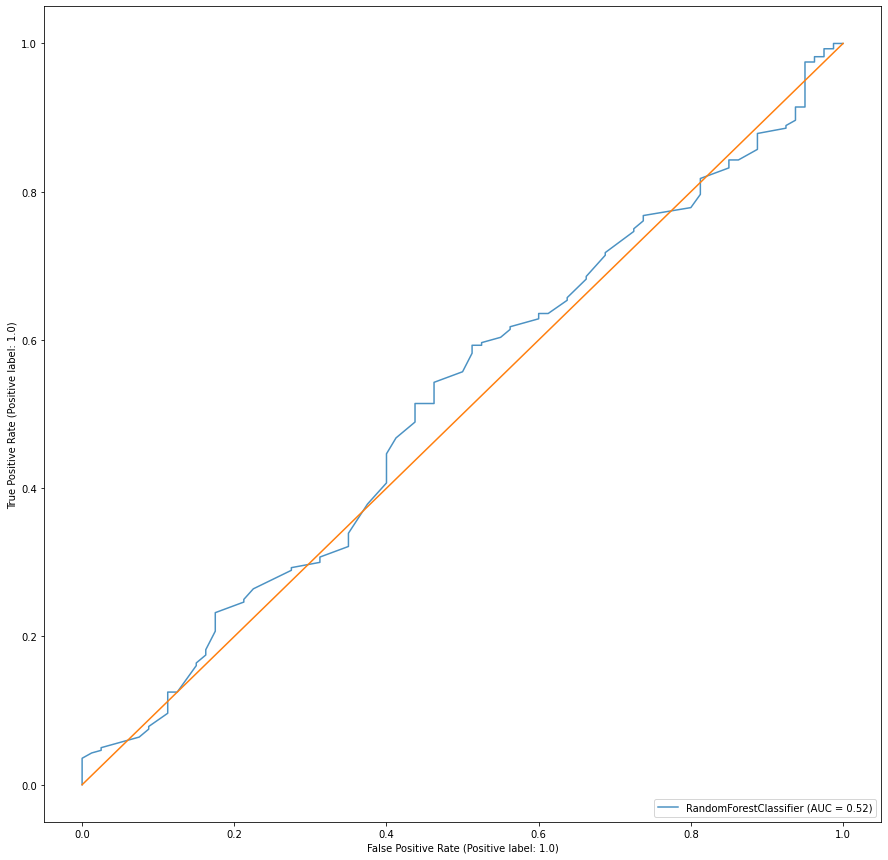

In [56]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(15,15))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=ax, alpha=0.8)
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
plt.show()

In [57]:
# feat_imp = pd.DataFrame(df_train[df_train.columns[1:-1]].columns, rfc.feature_importances_, 
#                          columns=['col_name']
#                         )
# feat_imp.reset_index(inplace= True)
# feat_imp

In [58]:
# drop_cols = []
# for i in feat_imp.index:
#   if feat_imp['index'][i] < 0.04:
#     drop_cols.append(feat_imp['col_name'][i])
# drop_cols

In [59]:
# x_train = x_train.drop(drop_cols, axis=1).copy()
# x_test = x_test.drop(drop_cols, axis=1).copy()

In [60]:
rfc = RandomForestClassifier(random_state=17)
rfc.fit(x_train, y_train)
y_hat = rfc.predict(x_test)
evaluation(y_test, y_hat)

Accuracy: 0.692
Precision: 0.772
Recall: 0.857
F1_score: 0.812
specificity: 0.113
negative predictive value: 0.184
Confusion matrix:
[[  9  71]
 [ 40 240]]


In [61]:
cols = df_train.columns[:-1]
max_corr = 0
split = ''
for c in cols:    
    a = df_train[c].value_counts()
    for i in a.index:
        sum1 = 0
        sum2 = 0
        df_train1 = df_train[df_train[c]>=i].copy()
        df_train2 = df_train[df_train[c]<i].copy()
        if len(df_train1) > 300 and len(df_train2) > 300:
          corr1 = df_train1.iloc[:,1:].corr()
          corr2 = df_train2.iloc[:,1:].corr()
          sum1 = corr1['show_up'].iloc[:-1].abs().sum()
          sum2 = corr2['show_up'].iloc[:-1].abs().sum()
          if sum1 > max_corr and sum1 > sum2:
              max_corr = sum1
              split = f'Split {c} by >={i}'
          elif sum2 > max_corr:
              max_corr = sum2
              split = f'Split {c} by <{i}'
print(f'the best corr was {max_corr} with a df {split}')

the best corr was 1.6223453493961388 with a df Split time_to_read_max by <5.296809


In [62]:
df_new = df_train[df_train['time_to_read_max']<5.296809].copy()
x = df_new.drop(['show_up', 'unique_id'], axis=1)
y = df_new['show_up']

x_train, x_test, y_train, y_test = train_test_split(
    x, 
    y, 
    test_size=0.2,
    random_state=17
)

In [63]:
cols = x_train.columns.tolist()
cols = cols[:-1]
scaler = MinMaxScaler()
x_train[cols] = scaler.fit_transform(x_train[cols])
x_test[cols] = scaler.transform(x_test[cols])

In [64]:
df_new['show_up'].value_counts()

1.0    291
0.0    100
Name: show_up, dtype: int64

In [65]:
df_train_2 = pd.concat([x_train, y_train], axis= 1)
df_train_2['show_up'].value_counts()

1.0    234
0.0    78 
Name: show_up, dtype: int64

In [66]:
df_train_1 = df_train_2[df_train_2['show_up']==1]
df_train_0 = df_train_2[df_train_2['show_up']==0]
df_train_over = df_train_0.sample(300, replace= True, random_state=0)
df_train_2 = pd.concat([df_train_1, df_train_over], axis=0)

In [67]:
x_train = df_train_2.iloc[:,:-1]
y_train = df_train_2.iloc[:,-1:]

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import (
    accuracy_score, 
    precision_score, 
    recall_score, 
    confusion_matrix,
    roc_curve,
    auc)

rfc = RandomForestClassifier(random_state=17)
rfc.fit(x_train, y_train)
y_hat = rfc.predict(x_test)
evaluation(y_test, y_hat)

Accuracy: 0.620
Precision: 0.714
Recall: 0.789
F1_score: 0.750
specificity: 0.182
negative predictive value: 0.250
Confusion matrix:
[[ 4 18]
 [12 45]]


In [69]:
corr = df_new.iloc[:,1:].corr()
print(corr['show_up'].iloc[:-1].abs())
print(corr['show_up'].iloc[:-1].abs().sum())
print(corr['show_up'].iloc[:-1].abs().max())

amount_channels                 0.067628
appointment_day                 0.045193
appointment_hr                  0.102293
appointment_month               0.000082
appointment_weekday             0.137559
assistant_word_count            0.010109
eniax_num_interactions          0.021199
num_rejected                    0.049509
num_sent                        0.104804
num_unread                      0.076454
patient_word_count              0.019044
response_rate                   0.103573
total_num_interactions          0.047490
user_num_interactions           0.088563
word_count                      0.015259
response_time_delivered_max     0.056921
response_time_read_max          0.103722
time_to_read_max                0.111487
response_time_delivered_min     0.029684
response_time_read_min          0.029684
time_to_read_min                0.086380
response_time_delivered_mean    0.100520
response_time_read_mean         0.114197
time_to_read_mean               0.100992
Name: show_up, d

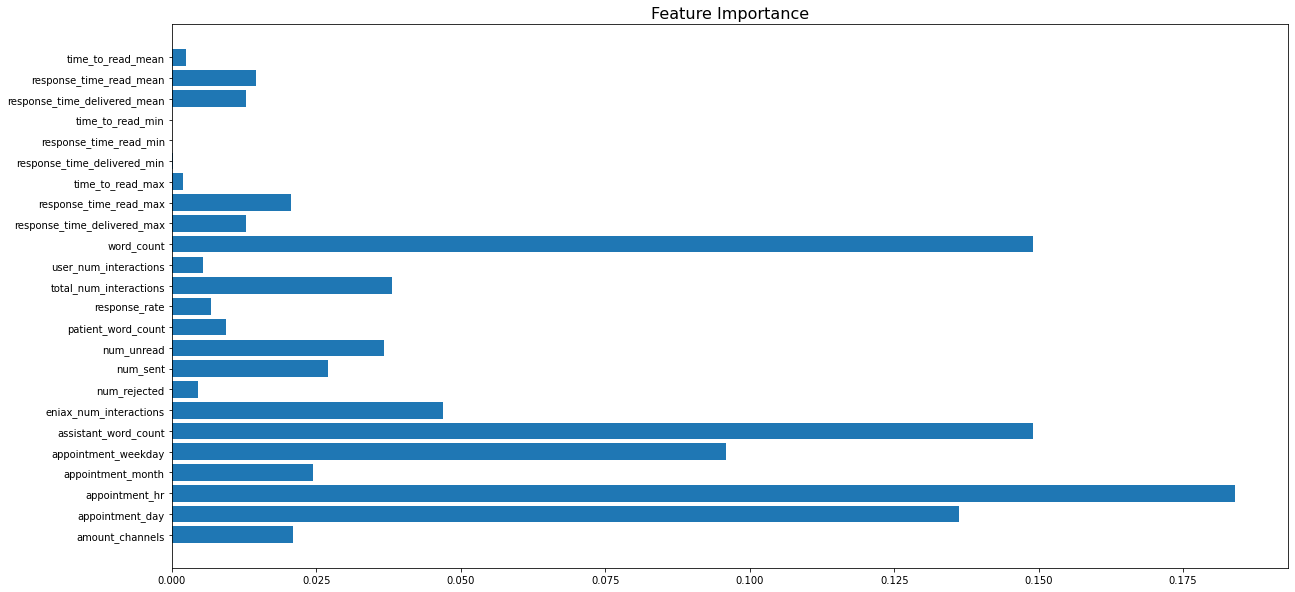

In [70]:
plt.figure(figsize=(20,10))
plt.barh(df_new[df_new.columns[1:-1]].columns, rfc.feature_importances_)
plt.title('Feature Importance', fontsize=16);

In [71]:
x_test.head(5)

,amount_channels,appointment_day,appointment_hr,appointment_month,appointment_weekday,assistant_word_count,eniax_num_interactions,num_rejected,num_sent,num_unread,patient_word_count,response_rate,total_num_interactions,user_num_interactions,word_count,response_time_delivered_max,response_time_read_max,time_to_read_max,response_time_delivered_min,response_time_read_min,time_to_read_min,response_time_delivered_mean,response_time_read_mean,time_to_read_mean
1596,0.0,0.428571,0.454545,0.0,0.6,0.326531,0.666667,0.0,0.0,0.714286,0.000000,0.0,0.666667,0.000000,0.297872,0.000000,0.000000,0.0,1.0,1.0,0.0,0.000051,0.000369,0.0
1094,0.0,0.571429,0.818182,0.0,0.0,0.068027,0.166667,0.0,0.0,0.285714,2.415441,1.0,0.500000,0.666667,0.416667,0.000342,0.999133,0.0,1.0,1.0,0.0,0.000223,1.000124,0.0
679,1.0,0.142857,0.181818,0.2,0.8,0.158730,0.333333,0.0,0.5,0.000000,0.000000,0.0,0.333333,0.000000,0.122931,0.000000,0.000000,0.0,1.0,1.0,0.0,0.000051,0.000369,0.0
1788,0.0,0.571429,0.818182,0.0,0.0,0.209751,0.833333,0.0,0.0,0.000000,0.000000,0.0,0.833333,0.000000,0.176123,0.000000,0.000000,0.0,1.0,1.0,0.0,0.000051,0.000369,0.0
664,0.0,0.892857,0.090909,0.0,0.4,0.108844,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.070922,0.000000,0.000000,0.0,1.0,1.0,0.0,0.000051,0.000369,0.0


In [72]:
x_train.head(5)

,amount_channels,appointment_day,appointment_hr,appointment_month,appointment_weekday,assistant_word_count,eniax_num_interactions,num_rejected,num_sent,num_unread,patient_word_count,response_rate,total_num_interactions,user_num_interactions,word_count,response_time_delivered_max,response_time_read_max,time_to_read_max,response_time_delivered_min,response_time_read_min,time_to_read_min,response_time_delivered_mean,response_time_read_mean,time_to_read_mean
1655,0.0,0.107143,0.454545,0.0,0.2,1.000000,0.166667,0.0,0.0,0.285714,0.0,0.0,0.166667,0.0,1.000000,0.0,0.0,0.0,1.0,1.0,0.0,0.000051,0.000369,0.0
650,1.0,0.964286,0.636364,0.0,0.8,0.139456,0.500000,0.0,0.5,0.000000,0.0,0.0,0.500000,0.0,0.102837,0.0,0.0,0.0,1.0,1.0,0.0,0.000051,0.000369,0.0
851,1.0,0.071429,0.090909,0.2,0.4,0.300680,0.666667,0.0,0.0,0.714286,0.0,0.0,0.666667,0.0,0.270922,0.0,0.0,0.0,1.0,1.0,0.0,0.000051,0.000369,0.0
183,1.0,0.428571,0.363636,0.0,0.6,0.145125,0.333333,0.0,0.5,0.000000,0.0,0.0,0.333333,0.0,0.108747,0.0,0.0,0.0,1.0,1.0,0.0,0.000051,0.000369,0.0
434,1.0,0.107143,0.181818,0.2,0.6,0.151927,0.333333,0.0,0.5,0.000000,0.0,0.0,0.333333,0.0,0.115839,0.0,0.0,0.0,1.0,1.0,0.0,0.000051,0.000369,0.0


In [73]:
feat_imp = pd.DataFrame(df_new[df_new.columns[1:-1]].columns, rfc.feature_importances_, 
                         columns=['col_name']
                        )
feat_imp.reset_index(inplace= True)
feat_imp

,index,col_name
0,0.020939,amount_channels
1,0.136151,appointment_day
2,0.183916,appointment_hr
3,0.024452,appointment_month
4,0.095944,appointment_weekday
5,0.148997,assistant_word_count
6,0.046947,eniax_num_interactions
7,0.004471,num_rejected
8,0.026985,num_sent
9,0.036798,num_unread


In [74]:
drop_cols = []
for i in feat_imp.index:
  if feat_imp['index'][i] < 0.04:
    drop_cols.append(feat_imp['col_name'][i])
drop_cols

['amount_channels',
 'appointment_month',
 'num_rejected',
 'num_sent',
 'num_unread',
 'patient_word_count',
 'response_rate',
 'total_num_interactions',
 'user_num_interactions',
 'response_time_delivered_max',
 'response_time_read_max',
 'time_to_read_max',
 'response_time_delivered_min',
 'response_time_read_min',
 'time_to_read_min',
 'response_time_delivered_mean',
 'response_time_read_mean',
 'time_to_read_mean']

In [75]:
x_train = x_train.drop(drop_cols, axis=1).copy()
x_test = x_test.drop(drop_cols, axis=1).copy()

In [76]:
rfc = RandomForestClassifier(random_state=17)
rfc.fit(x_train, y_train)
y_hat = rfc.predict(x_test)
evaluation(y_test, y_hat)

Accuracy: 0.608
Precision: 0.703
Recall: 0.789
F1_score: 0.744
specificity: 0.136
negative predictive value: 0.200
Confusion matrix:
[[ 3 19]
 [12 45]]


In [77]:
y_test.value_counts()

1.0    57
0.0    22
Name: show_up, dtype: int64

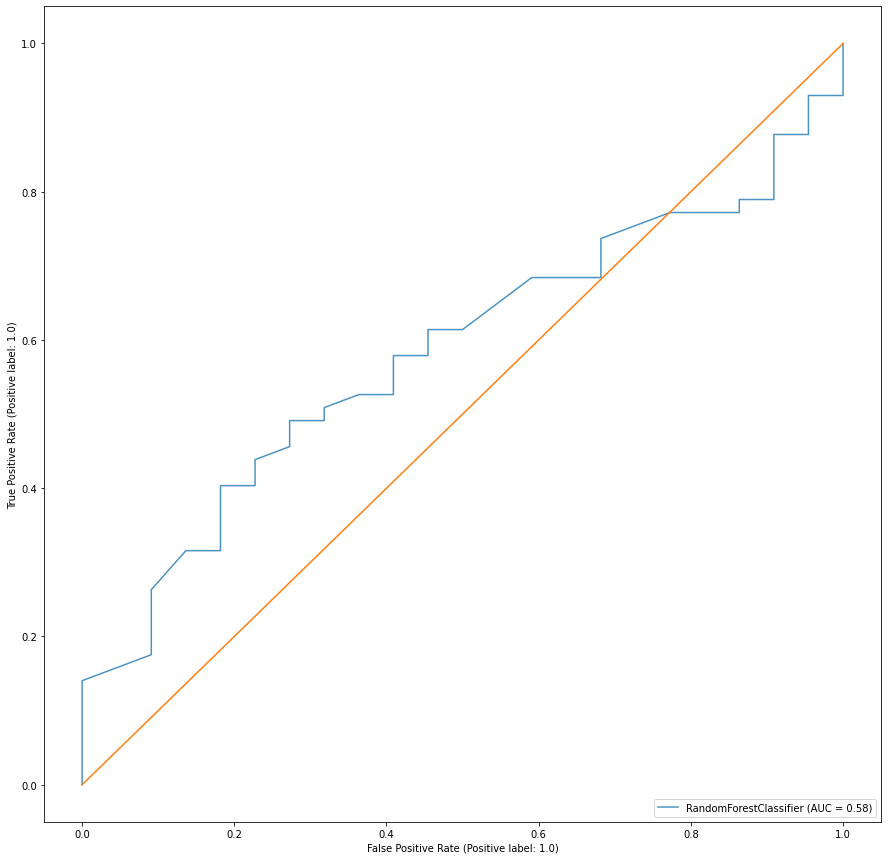

In [78]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(15,15))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(rfc, x_test, y_test, ax=ax, alpha=0.8)
plt.plot(np.linspace(0,1,10), np.linspace(0,1,10), label="diagonal")
plt.show()

In [79]:
threshold = 0.51
predicted_proba = rfc.predict_proba(x_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
evaluation(y_test, predicted)

Accuracy: 0.595
Precision: 0.698
Recall: 0.772
F1_score: 0.733
specificity: 0.136
negative predictive value: 0.188
Confusion matrix:
[[ 3 19]
 [13 44]]


Best NPV was achieve with a threshold of 0


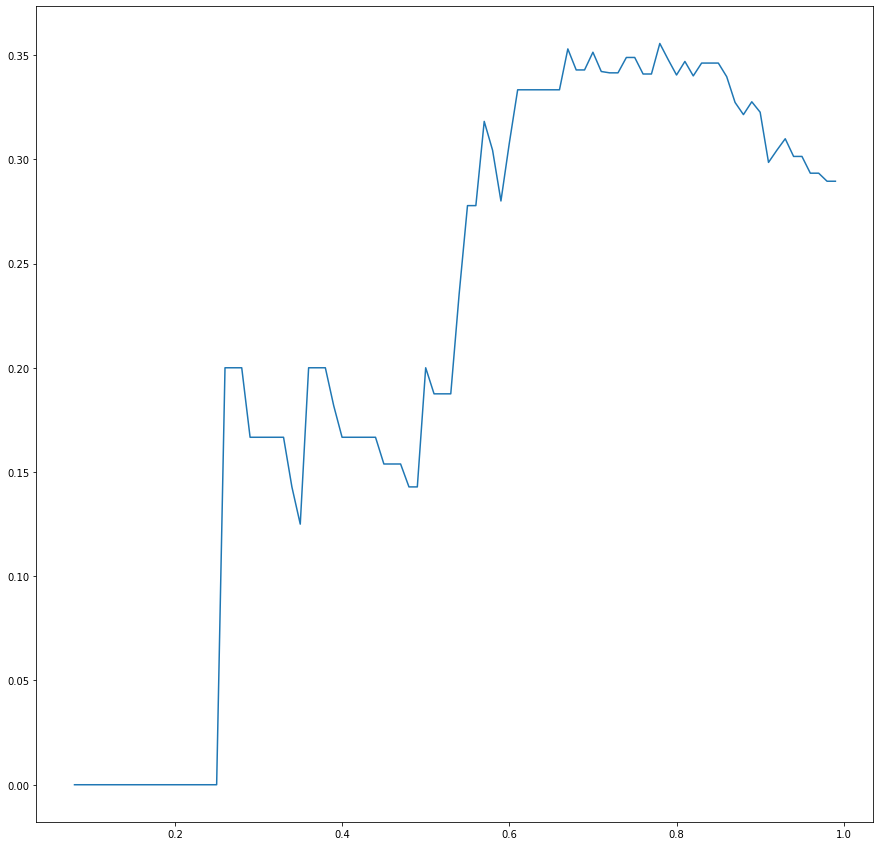

In [80]:
plt.figure(figsize=(15,15))
thres = [x/100 for x in range(1,100)]
best_thres = 0
max_npv = []
list_npv = []
for i in thres:
  threshold = i
  predicted_proba = rfc.predict_proba(x_test)
  predicted = (predicted_proba [:,1] >= threshold).astype('int')
  confusion_mtx = confusion_matrix(y_test, predicted, labels=np.unique(y_train))
  specificity = confusion_mtx[0,0]/(confusion_mtx[0,0]+confusion_mtx[0,1])
  negative_predictive_value = confusion_mtx[0,0]/(confusion_mtx[0,0]+confusion_mtx[1,0])
  # print(f'threshold: {i} NPV: {negative_predictive_value}')
  # print(confusion_mtx)
  list_npv.append(negative_predictive_value)
  if negative_predictive_value >= max_npv:
    max_npv = negative_predictive_value
    best_thres = i
print(f'Best NPV was achieve with a threshold of {best_thres}')
plt.plot(thres,list_npv)

Best specificity was achieve with a threshold of 0


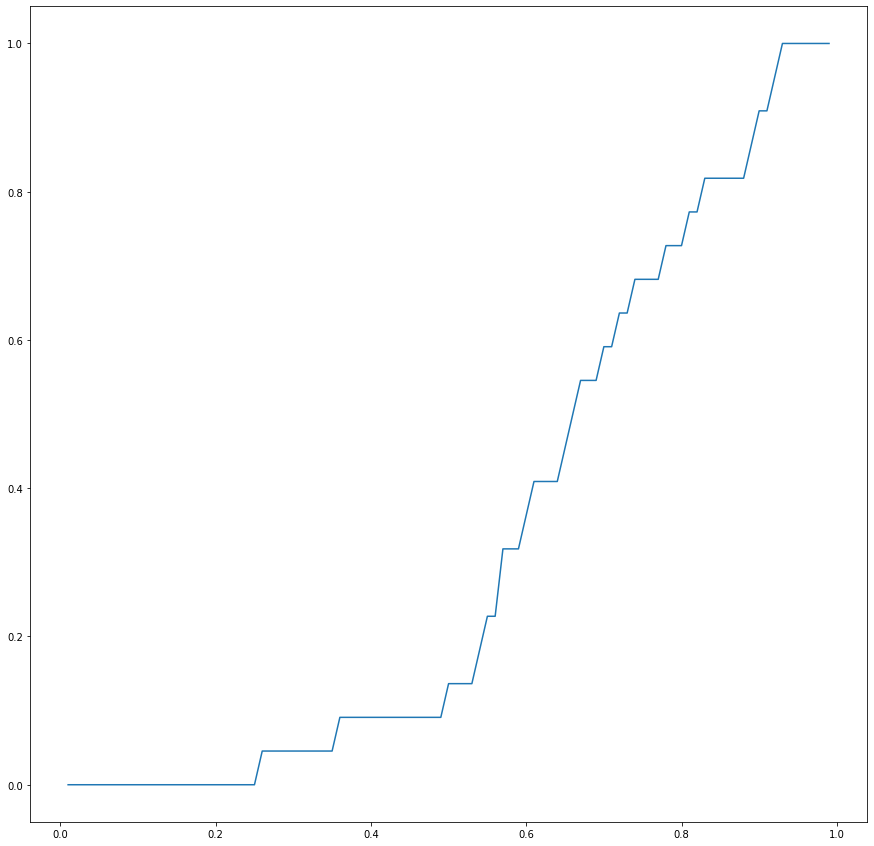

In [81]:
plt.figure(figsize=(15,15))
thres = [x/100 for x in range(1,100)]
best_thres = 0
max_specificity = []
list_specificity = []
for i in thres:
  threshold = i
  predicted_proba = rfc.predict_proba(x_test)
  predicted = (predicted_proba [:,1] >= threshold).astype('int')
  confusion_mtx = confusion_matrix(y_test, predicted, labels=np.unique(y_train))
  specificity = confusion_mtx[0,0]/(confusion_mtx[0,0]+confusion_mtx[0,1])
  negative_predictive_value = confusion_mtx[0,0]/(confusion_mtx[0,0]+confusion_mtx[1,0])
  # print(f'threshold: {i} specificity: {specificity}')
  # print(confusion_mtx)
  list_specificity.append(specificity)
  if specificity >= max_specificity:
    max_specificity = specificity
    best_thres = i
print(f'Best specificity was achieve with a threshold of {best_thres}')
plt.plot(thres,list_specificity)

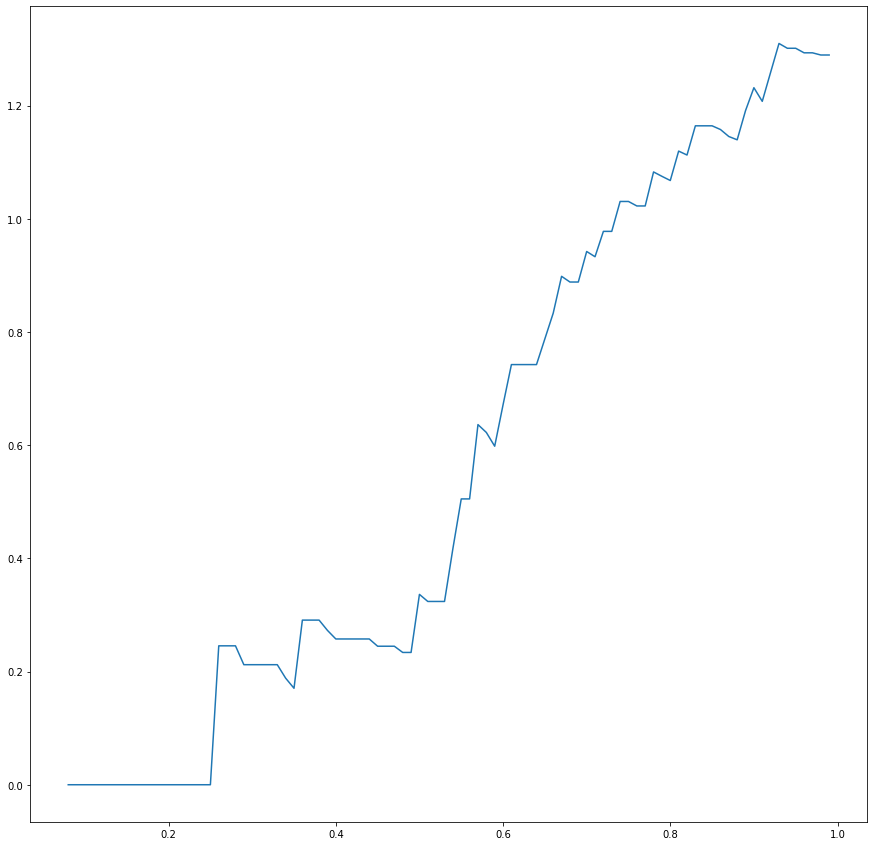

In [82]:
list_sum = list(map(lambda x, y: x + y, list_specificity, list_npv))
plt.figure(figsize=(15,15))
plt.plot(thres,list_sum)

In [83]:
threshold = 0.78
predicted_proba = rfc.predict_proba(x_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')
evaluation(y_test, predicted)

Accuracy: 0.557
Precision: 0.824
Recall: 0.491
F1_score: 0.615
specificity: 0.727
negative predictive value: 0.356
Confusion matrix:
[[16  6]
 [29 28]]
